# Mosaics with ```rasterio```

This notebook demonstrates how to merge images into a mosaic using ```rasterio```.

In [17]:
%matplotlib inline
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import numpy as np
import glob
import os

## The list of images we want to mosaic

Here I use the NAIP blobs on Azure to create a single mosaic.

In [2]:
image_list = ['http://naipblobs.blob.core.windows.net/naip/data/v1/2012/states/mo/mo_1m_2012/35089/m_3508901_ne_16_1_20120614.mrf',
'http://naipblobs.blob.core.windows.net/naip/data/v1/2012/states/mo/mo_1m_2012/35089/m_3508901_nw_16_1_20120614.mrf']#,
#'http://naipblobs.blob.core.windows.net/naip/data/v1/2012/states/mo/mo_1m_2012/35089/m_3508902_nw_16_1_20120614.mrf']
              

## Open the images

In this step, I open each image and add the opened image into the file list.

In [5]:
src_files_to_mosiac = []

for sim in image_list:
    src = rasterio.open(sim)
    src_files_to_mosiac.append(src)

src_files_to_mosiac

[<open DatasetReader name='http://naipblobs.blob.core.windows.net/naip/data/v1/2012/states/mo/mo_1m_2012/35089/m_3508901_ne_16_1_20120614.mrf' mode='r'>,
 <open DatasetReader name='http://naipblobs.blob.core.windows.net/naip/data/v1/2012/states/mo/mo_1m_2012/35089/m_3508901_nw_16_1_20120614.mrf' mode='r'>]

## Plot the images

I will take a look at the images in matplotlib. First, I need to stack the red, green, and blue bands into a **numpy** array.

In [26]:
# Convert to numpy arrays
r = src_files_to_mosiac[0].read(1)
g = src_files_to_mosiac[0].read(2)
b = src_files_to_mosiac[0].read(3)

# Stack bands
rgb = np.stack((r, g, b))

In [27]:
rgb.shape

(3, 7705, 6447)

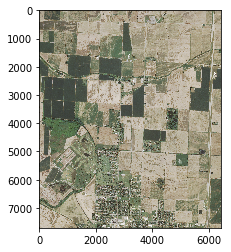

In [28]:
show(rgb)#,cmap='terrain')

<class 'numpy.ndarray'>


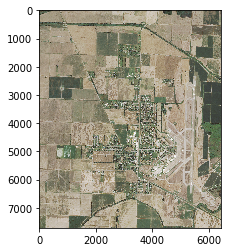

In [29]:
# Convert to numpy arrays
r = src_files_to_mosiac[1].read(1)
g = src_files_to_mosiac[1].read(2)
b = src_files_to_mosiac[1].read(3)
print(type(r))

# Stack bands
rgb = np.stack((r, g, b))
show(rgb)#,cmap='terrain')

## Merge the images

Here, I merge the images.

In [8]:
mos, out_trans = merge(src_files_to_mosiac)

In [9]:
mos.shape

(4, 7876, 12086)

## Viewing the mosaic

Here is the mosaic in matplotlib.

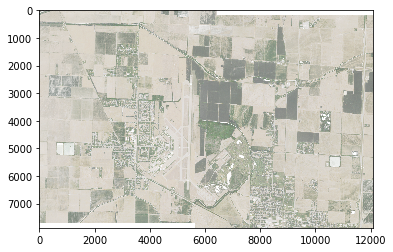

In [10]:
show(mos)#, cmap='terrain')

## Write to disk

Finally, I can write the mosaic to disk in MRF format.

In [11]:
outpath = r"C:\PROJECTS\DEVELOPING_IMAGERY_ARTIFACTS\Week3\Mosiac.mrf"

In [12]:
with rasterio.open(outpath,"w", driver ='mrf',count=4,
            height= mos.shape[1],
            width= mos.shape[2],
            transform= out_trans,
            crs= src.crs,
            dtype= src.dtypes[0]) as dest:
    dest.write(mos)